In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [11]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from model_equations_separate_NC_sep_vmax import *

In [13]:
import run_sensitivity

In [14]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [65]:
paramorder = [
    'E^I_h',
 'E^I_p',
 'E^O_h',
 'E^O_p',
 
    
 'K^IC_h',
 'K^IC_p',
 'K^IN_h',
 'K^IN_p',
 'K^OC_h',
 'K^OC_p',
 'K^ON_h',
 'K^ON_p',
 'Vmax^IC_p',
 'Vmax^IN_h',
 'Vmax^IN_p',
 'Vmax^OC_h',
 'Vmax^ON_h',
    
 'M_h',
 'M_p',
 'gamma^D_h',
 'gamma^D_p',
 'O_h',
 'O_p',

    'E^S_h',
 'E^S_p',
 'K^S_h',
 'K^S_p',
 'M^S_h',
 'M^S_p',

    'epsilon',
    'VTmax',
]


In [15]:
refdf = pd.read_csv('prelim_bottle.csv')


In [16]:
dpath = r'C:\Users\wosnat\OneDrive - University of Haifa\Documents\results\recycle_model\res'
import glob

res_glob_pattern = '*_df.csv.gz'
sum_glob_pattern = '*_sum.csv.gz'

sum_df = pd.concat ( [ 
    pd.read_csv(f) for f in glob.glob(os.path.join(dpath,sum_glob_pattern ))
] )
df = pd.concat ( [ 
    pd.read_csv(f) for f in glob.glob(os.path.join(dpath,res_glob_pattern ))
] )



In [17]:
sum_df.shape

C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

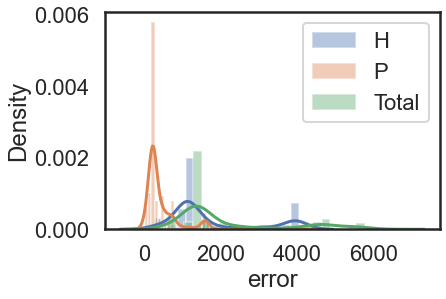

In [18]:
sns.distplot(sum_df.h_err, label='H')
sns.distplot(sum_df.p_err, label='P')
sns.distplot(sum_df.error, label='Total')
plt.legend()


In [19]:
sum_df.nsmallest(columns='error', n=10)

Unnamed: 0       M_h       M_p  gamma^D_p  gamma^D_h    R_p    R_h  \
103           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
480           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
905           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
167           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
931           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
856           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
397           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
415           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
797           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
746           0  0.000001  0.000001        0.8        0.8  6.625  6.625   

        E^O_p  E^I_p  E^O_h  ...      r0_p      r0_h   b_p   b_h  \
103  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
480  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
905  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
167  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
931  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
856  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
397  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
415  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
797  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
746  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   

                                     run_id  status       h_err       p_err  \
103      pse3_K^IN_p_2_h4895258542848259320       0  425.379163  174.527918   
480  pse3_Vmax^IN_h_1_h-7513917998685876004       0  418.814692  185.051998   
905     pse3_K^IN_p_27_h8303337785735256703       0  329.516562  288.502729   
167     pse3_K^IN_p_28_h6408706487068416639       0  326.025796  291.998155   
931    pse3_K^IN_p_29_h-9021463787978602026       0  322.585725  295.731667   
856     pse3_K^IN_p_26_h3376669633427470516       0  333.058218  285.259638   
397    pse3_K^IN_p_25_h-5995858735569454924       0  336.650937  282.274217   
415     pse3_K^IN_p_3_h-2783711916032855757       0  412.799176  206.254928   
797      pse3_K^IN_p_24_h600355963632533181       0  340.294872  279.540699   
746     pse3_K^IN_p_23_h4469759030013230781       0  343.990159  277.040007   

          error  logerror  
103  599.907081  6.396775  
480  603.866691  6.403353  
905  618.019290  6.426520  
167  618.023951  6.426527  
931  618.317392  6.427002  
856  618.317855  6.427003  
397  618.925154  6.427984  
415  619.054104  6.428193  
797  619.835571  6.429454  
746  621.030167  6.431380  

[10 rows x 50 columns]

In [20]:
df.head()

Unnamed: 0         Bp         Bh        DON      RDON         DIN  \
0           0   1.100000  44.000000  20.000000  0.000000  100.000000   
1           1   2.606936  40.845418  12.537471  1.699380  107.410795   
2           2  10.862790  23.028665  10.328857  3.829939  117.049749   
3           3  28.249983  23.702312  13.805437  5.493994   93.848274   
4           4  69.592012  25.906863  24.353475  8.217502   37.030148   

          DOC       RDOC          DIC       ROS  ...  Treleasep  Tbreakdownh  \
0  132.500000   0.000000  3000.000000  0.000000  ...   0.000001     0.000000   
1    0.089237  11.258392  3039.548294  0.006758  ...   0.000003     0.000003   
2    0.727972  25.373348  2993.682056  0.059017  ...   0.000011     0.000011   
3   30.915065  36.397713  2936.932575  0.221682  ...   0.000030     0.000028   
4  227.771976  54.440952  2809.235065  1.393588  ...   0.000073     0.000055   

   respirationp  respirationh    dic_uptake       Bp[C]       Bh[C]  \
0      0.000002      0.000094 -1.040834e-16    7.287500  291.500000   
1      0.000006      0.000086 -7.580090e-04   17.270953  270.600893   
2      0.000024      0.000049  1.210939e-04   71.965981  152.564908   
3      0.000062      0.000051  1.208792e-03  187.156135  157.027816   
4      0.000152      0.000055  3.656328e-03  461.047079  171.632966   

          Sp[C]         Sh[C]                              run_id  
0  0.000000e+00  0.000000e+00  pse3_K^ON_h_26_h140881377159304070  
1  1.915196e-10  6.157414e-10  pse3_K^ON_h_26_h140881377159304070  
2  1.240930e-09  1.286551e-09  pse3_K^ON_h_26_h140881377159304070  
3  3.455679e-09  1.636092e-09  pse3_K^ON_h_26_h140881377159304070  
4  8.783421e-09  1.995308e-09  pse3_K^ON_h_26_h140881377159304070  

[5 rows x 54 columns]

In [21]:
df.columns

Index(['Unnamed: 0', 'Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC',
       'ROS', 'Sp', 'Sh', 't', 'day', 'Xp', 'Xh', 'limINp', 'limONp', 'limICp',
       'limOCp', 'limINh', 'limONh', 'limICh', 'limOCh', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeICp', 'gross_uptakeOCp',
       'gross_uptakeINh', 'gross_uptakeONh', 'gross_uptakeICh',
       'gross_uptakeOCh', 'actual_uptakeNp', 'actual_uptakeNh', 'overflowNp',
       'overflowCp', 'overflowNh', 'overflowCh', 'deathp', 'deathh',
       'exudationOp', 'exudationIp', 'exudationOh', 'exudationIh', 'Treleasep',
       'Tbreakdownh', 'respirationp', 'respirationh', 'dic_uptake', 'Bp[C]',
       'Bh[C]', 'Sp[C]', 'Sh[C]', 'run_id'],
      dtype='object')

In [22]:
mdf = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccxorder+ccnorder+cccorder)

In [23]:
sum_df.run_id.unique()

array(['pse3_omega_25_h4016194555064148555',
       'pse3_KT_h_19_h9037842098092365192',
       'pse3_K^ON_h_5_h8417574541421310172',
       'pse3_Vmax^ON_h_6_h4651015129754853736',
       'pse3_K^IC_h_2_h2581565121795699553',
       'pse3_Vmax^ON_h_16_h4349491667408485670',
       'pse3_gamma^D_p_12_h-7092790904913702216',
       'pse3_E^I_p_20_h-1034550739323870',
       'pse3_gamma^D_p_27_h-6543710287939698120',
       'pse3_K^S_h_22_h5824372521012635052',
       'pse3_K^ON_p_13_h5977776828928165678',
       'pse3_gamma^D_h_28_h-5027103785325994696',
       'pse3_K^IN_h_1_h5415738782719208760',
       'pse3_gamma^D_h_27_h-1018835643244551624',
       'pse3_E^I_p_6_h-4028213360463705975',
       'pse3_omega_28_h7582982289209043531',
       'pse3_K^IC_p_8_h2203589386471328783',
       'pse3_K^S_h_21_h979349501648793755',
       'pse3_VTmax_1_h-3019759377298108834',
       'pse3_E^I_h_19_h-449435713503590713',
       'pse3_O_p_22_h-9186655482102151929',
       'pse3_K^IC_p_14_h-5118776

In [28]:
sum_df[['sen_param', 'idx']] = sum_df.run_id.str.replace('pse3_', '').replace(r'_h[\-]?\d+','', regex=True).str.rsplit('_', n=1, expand=True)

In [29]:
df[['sen_param', 'idx']] = df.run_id.str.replace('pse3_', '').replace(r'_h[\-]?\d+','', regex=True).str.rsplit('_', n=1, expand=True)

In [37]:
df.min()

Unnamed: 0                                         0
Bp                                               0.0
Bh                                               0.0
DON                                         0.000529
RDON                                             0.0
DIN                                      -386.340986
DOC                                  -1030865.211261
RDOC                                             0.0
DIC                                          0.08381
ROS                                              0.0
Sp                                               0.0
Sh                                               0.0
t                                                0.0
day                                              0.0
Xp                                          0.002958
Xh                                               0.0
limINp                                      0.008755
limONp                                      0.003691
limICp                                      0.

In [49]:
problematic_run_ids = np.concatenate ([df.loc[df.DOC < 0, 'run_id'].unique() , df.loc[df.DIN < 0, 'run_id'].unique()])

In [69]:
problematic_run_ids

array(['pse3_Vmax^OC_h_20_h2781235276912829570',
       'pse3_Vmax^OC_h_19_h5956882267809881519',
       'pse3_Vmax^OC_h_29_h-4569445501711681708',
       'pse3_Vmax^OC_h_27_h5148497211077212318',
       'pse3_Vmax^OC_h_21_h-2308573018430418155',
       'pse3_Vmax^OC_h_25_h7825227574510490832',
       'pse3_K^IN_p_0_h572486240202791331'], dtype=object)

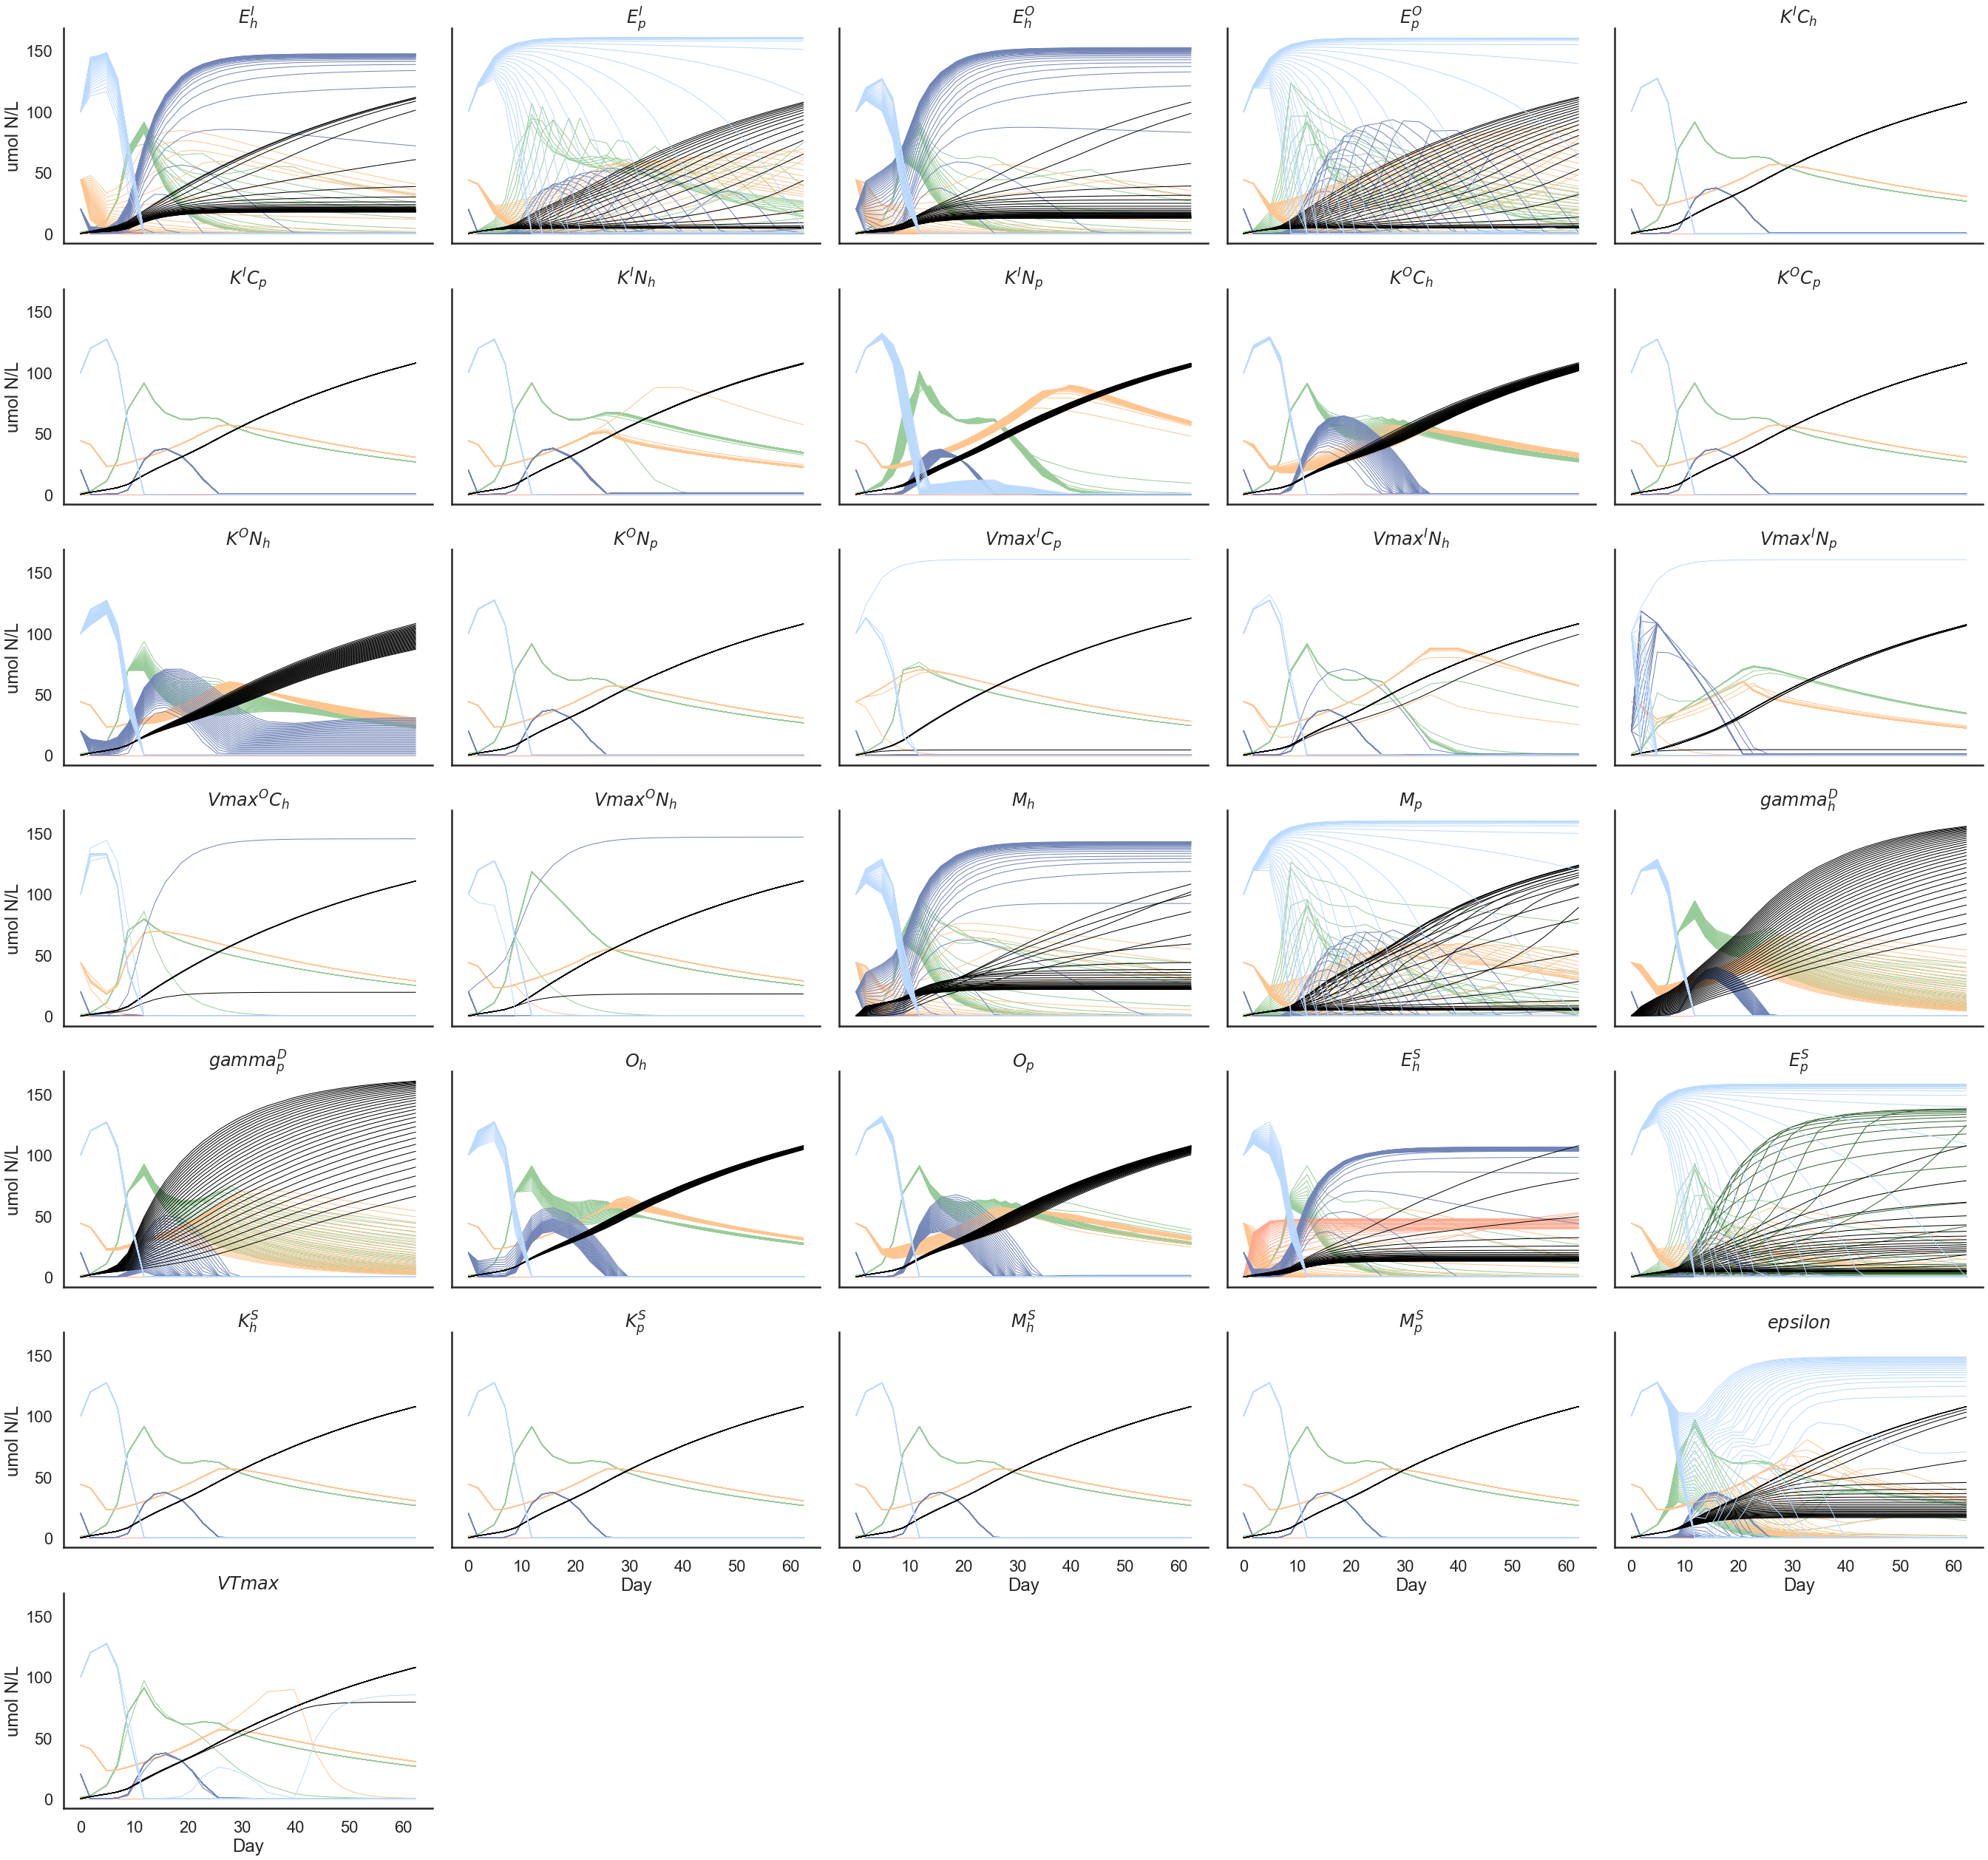

In [70]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'

mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


g = sns.relplot(
    data=mdf2, 
    x='Day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    estimator=None, units='run_id',
    col='sen_param', col_order= paramorder,
    col_wrap=5,
    kind='line', lw=1,
    aspect=1.5, legend=False,
)
    


#g.map_dataframe(pp)


g.set(ylabel='umol N/L')
g.set_titles(col_template='${col_name}$',)


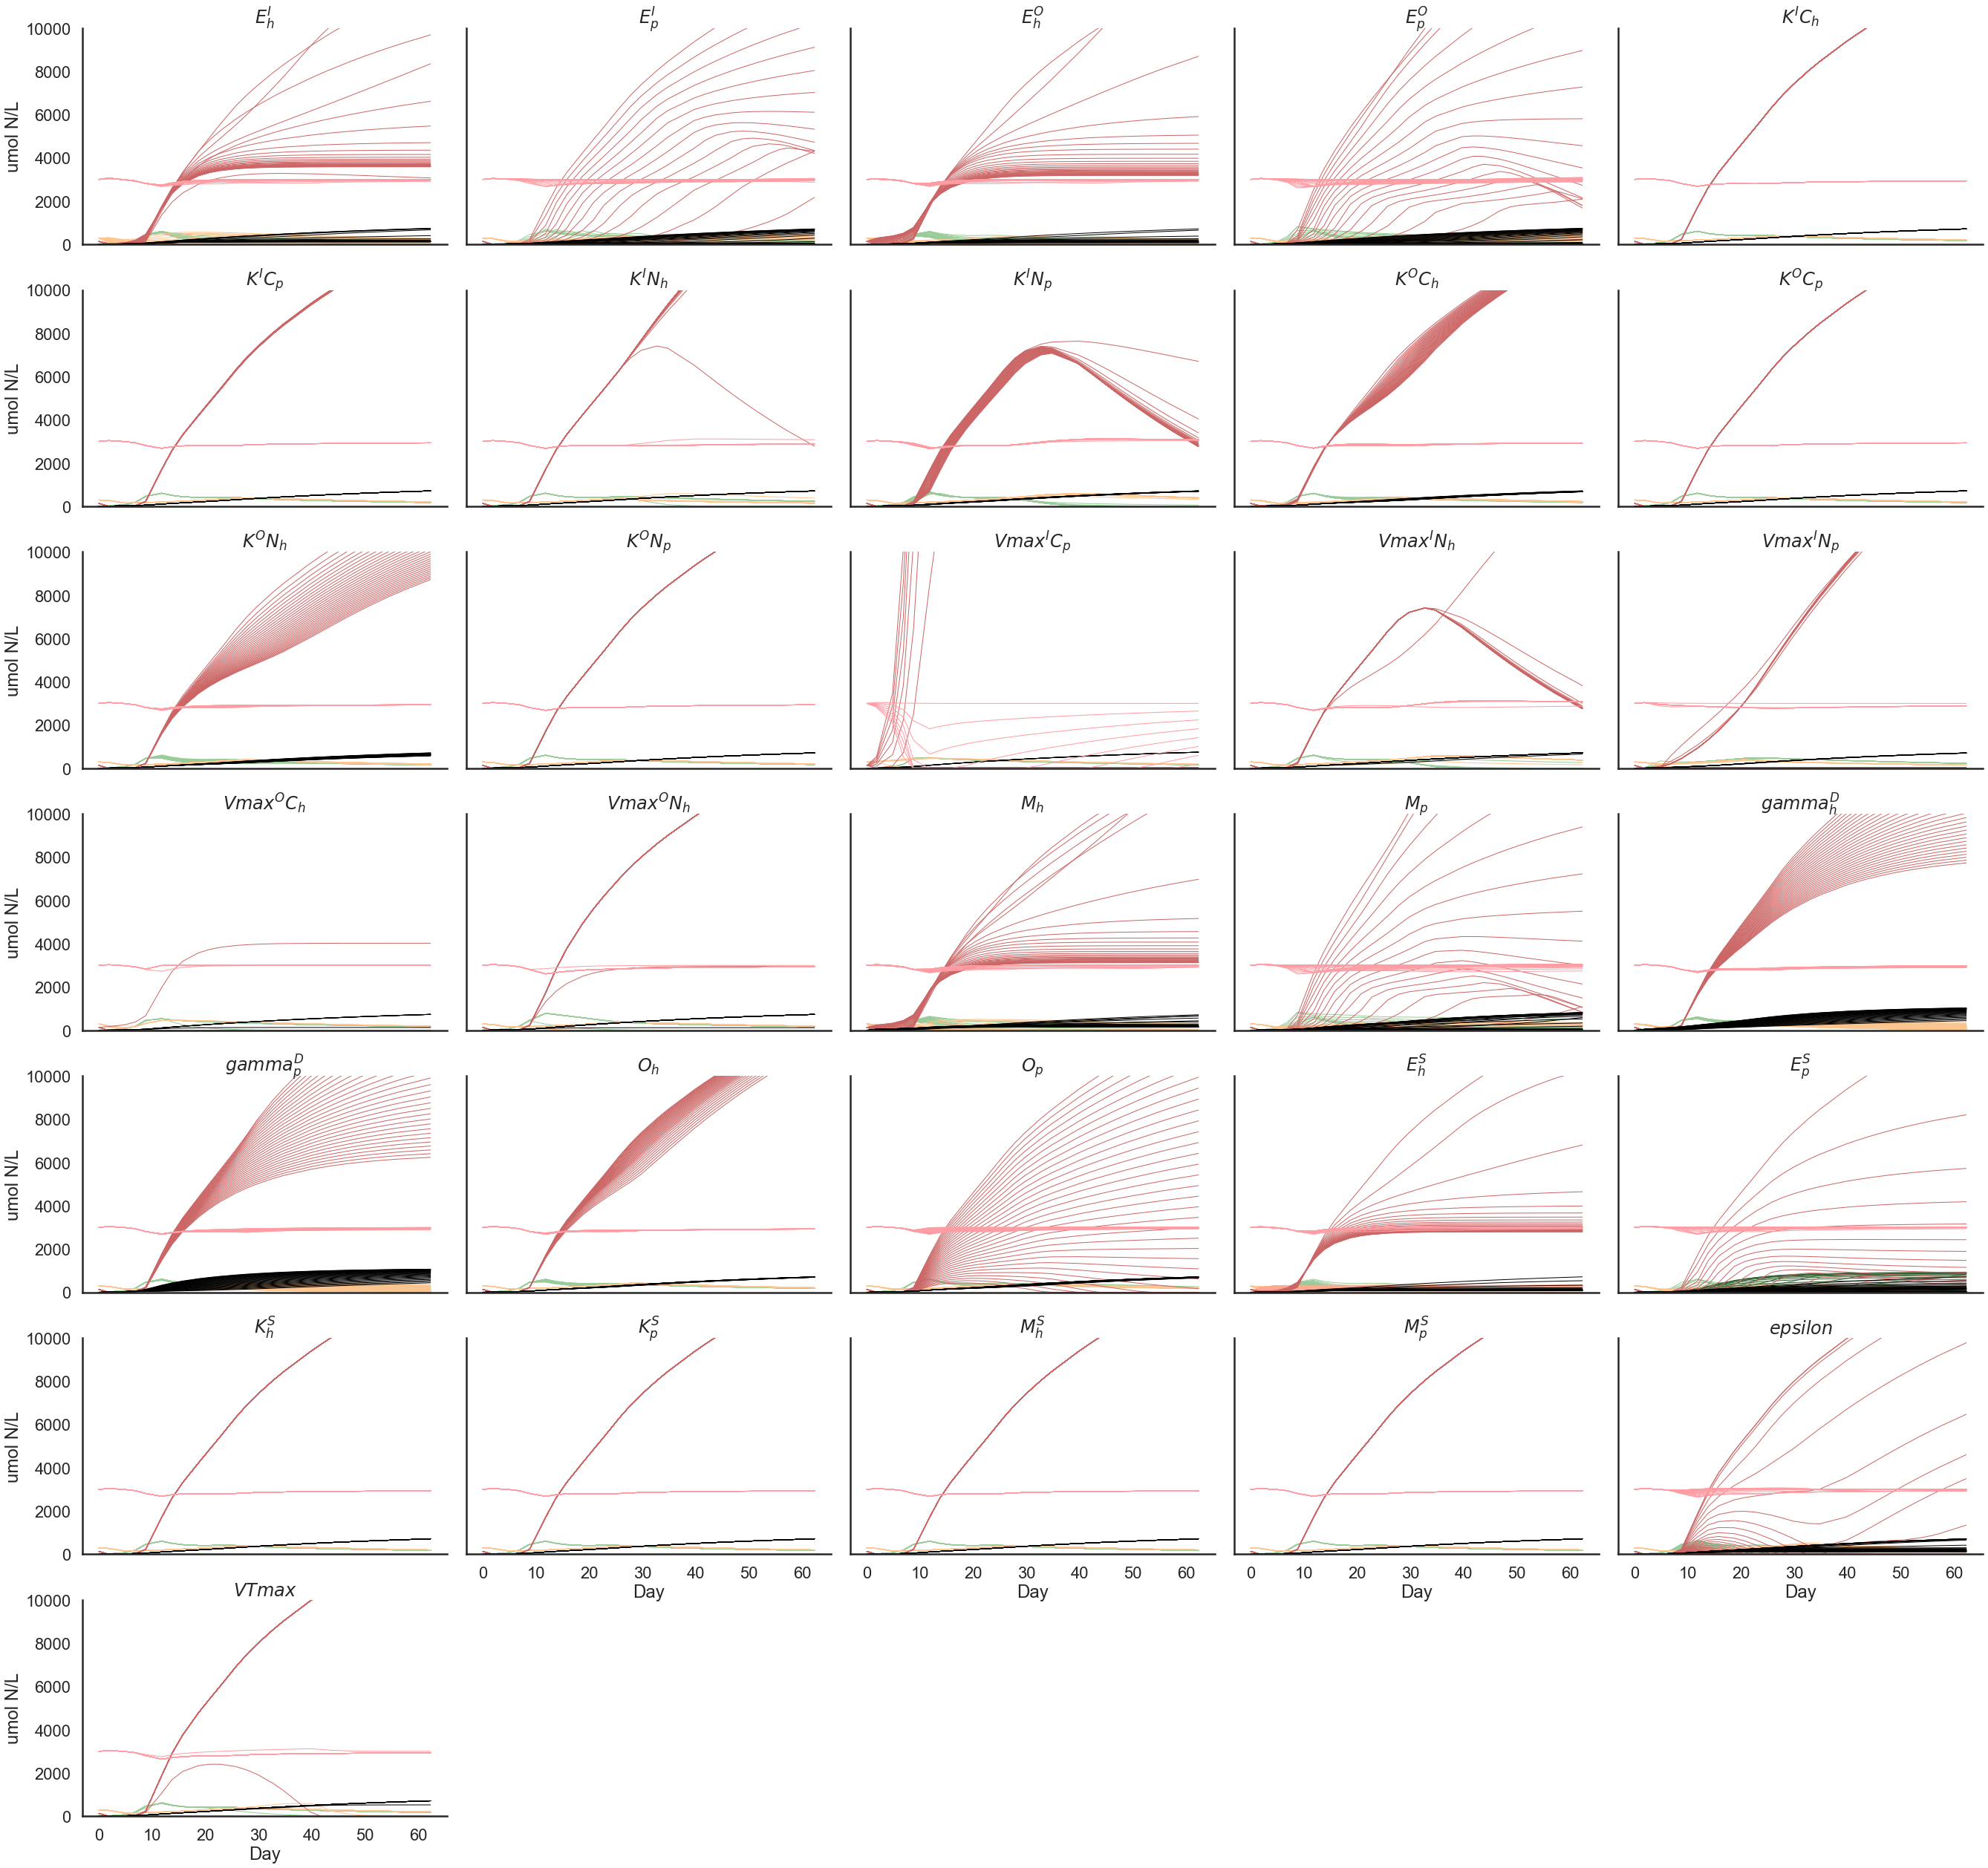

In [74]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'

mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


g = sns.relplot(
    data=mdf2, 
    x='Day', y='value',
    hue='variable', hue_order=cccorder, palette=cccpalette,
    estimator=None, units='run_id',
    col='sen_param', col_order= paramorder,
    col_wrap=5,
    kind='line', lw=1,
    aspect=1.5, legend=False,
)
    


#g.map_dataframe(pp)


g.set(ylabel='umol N/L', ylim=(0,10000))
g.set_titles(col_template='${col_name}$',)


In [68]:
sum_df.groupby ('sen_param')['idx'].count()

sen_param
E^I_h        30
E^I_p        30
E^O_h        30
E^O_p        30
E^S_h        30
E^S_p        30
KT_h         30
K^IC_h       30
K^IC_p       30
K^IN_h       30
K^IN_p       30
K^OC_h       30
K^OC_p       30
K^ON_h       30
K^ON_p       30
K^S_h        30
K^S_p        30
M^S_h        30
M^S_p        30
M_h          30
M_p          30
O_h          30
O_p          30
VTmax        30
Vmax^IC_p     8
Vmax^IN_h    30
Vmax^IN_p    15
Vmax^OC_h    15
Vmax^ON_h    30
epsilon      30
gamma^D_h    30
gamma^D_p    30
omega        30
Name: idx, dtype: int64

In [30]:
lowest_ids = sum_df.nsmallest(columns='error', n=10)['run_id']

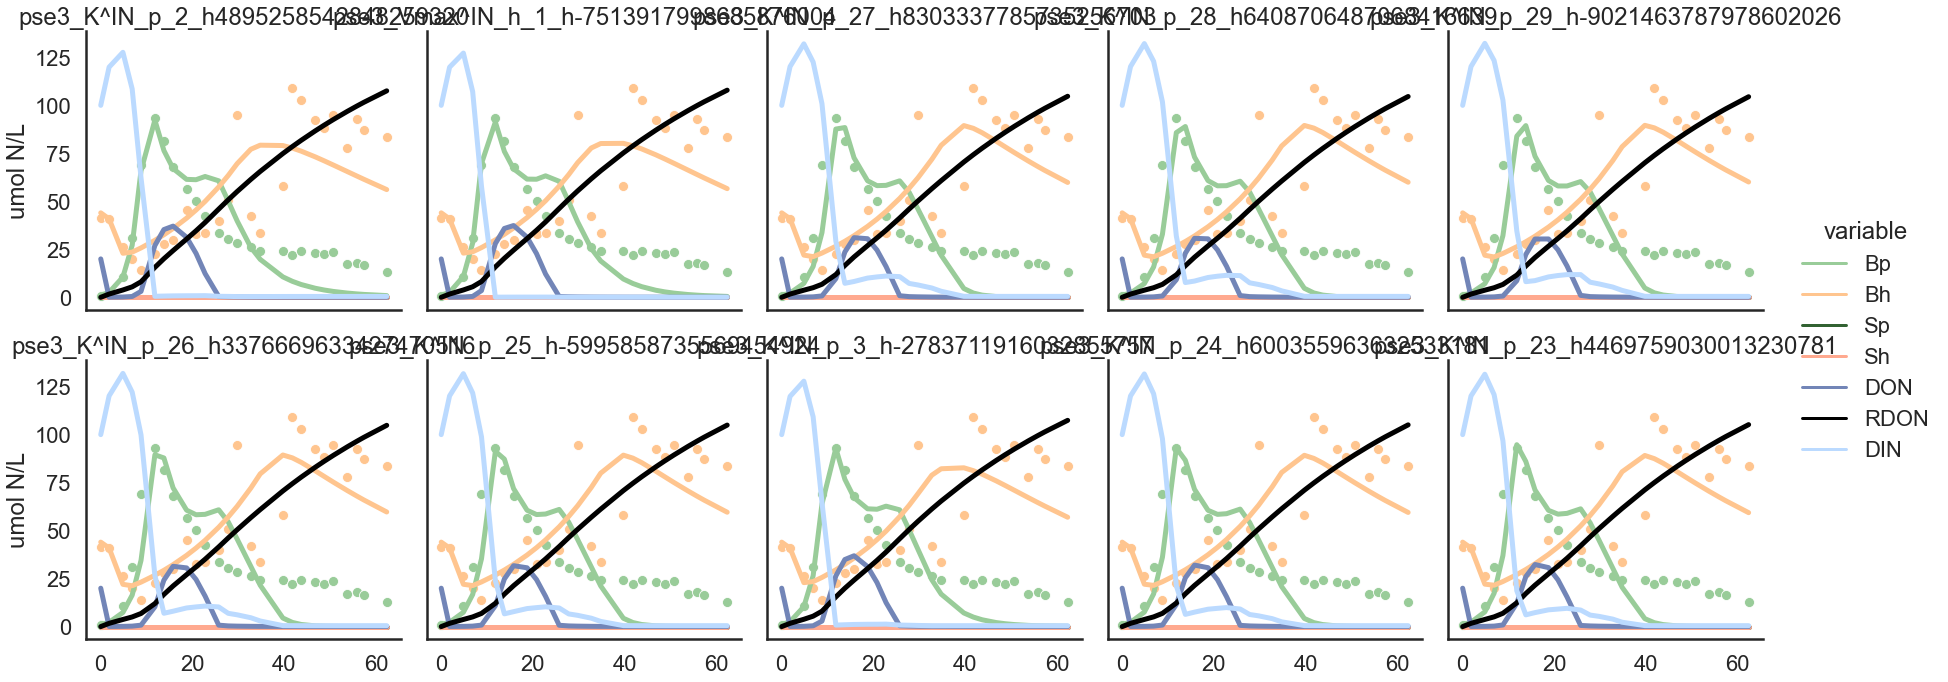

In [31]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [32]:
sum_df.nlargest(10, 'error', )

Unnamed: 0       M_h       M_p  gamma^D_p  gamma^D_h    R_p    R_h  \
655           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
632           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
78            0  0.000001  0.000001        0.8        0.8  6.625  6.625   
682           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
736           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
81            0  0.000001  0.000001        0.8        0.8  6.625  6.625   
255           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
351           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
102           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
153           0  0.000001  0.000001        0.8        0.8  6.625  6.625   

        E^O_p     E^I_p  E^O_h  ...   b_p   b_h  \
655  0.000001  0.000000    0.0  ...  0.01  0.01   
632  0.000001  0.000000    0.0  ...  0.01  0.01   
78   0.000001  0.000000    0.0  ...  0.01  0.01   
682  0.000001  0.000010    0.0  ...  0.01  0.01   
736  0.000001  0.000000    0.0  ...  0.01  0.01   
81   0.000001  0.000010    0.0  ...  0.01  0.01   
255  0.000001  0.000000    0.0  ...  0.01  0.01   
351  0.000001  0.000010    0.0  ...  0.01  0.01   
102  0.000001  0.000000    0.0  ...  0.01  0.01   
153  0.000001  0.000009    0.0  ...  0.01  0.01   

                                     run_id  status        h_err        p_err  \
655       pse3_K^IN_p_0_h572486240202791331       0  2035.065363  4185.722190   
632  pse3_Vmax^IC_p_0_h-2174719847254567338       0  3960.278129  1604.005997   
78       pse3_E^S_p_29_h1770893954551157256       0  3959.523887  1604.300110   
682     pse3_E^I_p_29_h-7578801626845203670       0  3959.465902  1604.300071   
736       pse3_E^S_p_28_h990798773493697964       0  3959.365189  1604.161582   
81       pse3_E^I_p_28_h-803296682712597538       0  3959.306143  1604.161529   
255      pse3_E^S_p_27_h1120327536269817037       0  3959.169590  1603.978140   
351      pse3_E^I_p_27_h6521118161067753463       0  3959.109347  1603.978068   
102     pse3_E^S_p_26_h-4337032382552937935       0  3958.923820  1603.732336   
153     pse3_E^I_p_26_h-3103413269594422901       0  3958.862206  1603.732237   

           error  logerror  sen_param  idx  
655  6220.787553  8.735652     K^IN_p    0  
632  5564.284126  8.624124  Vmax^IC_p    0  
78   5563.823997  8.624041      E^S_p   29  
682  5563.765973  8.624030      E^I_p   29  
736  5563.526771  8.623987      E^S_p   28  
81   5563.467672  8.623977      E^I_p   28  
255  5563.147729  8.623919      E^S_p   27  
351  5563.087416  8.623909      E^I_p   27  
102  5562.656156  8.623831      E^S_p   26  
153  5562.594443  8.623820      E^I_p   26  

[10 rows x 52 columns]

In [33]:
df.columns

Index(['Unnamed: 0', 'Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC',
       'ROS', 'Sp', 'Sh', 't', 'day', 'Xp', 'Xh', 'limINp', 'limONp', 'limICp',
       'limOCp', 'limINh', 'limONh', 'limICh', 'limOCh', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeICp', 'gross_uptakeOCp',
       'gross_uptakeINh', 'gross_uptakeONh', 'gross_uptakeICh',
       'gross_uptakeOCh', 'actual_uptakeNp', 'actual_uptakeNh', 'overflowNp',
       'overflowCp', 'overflowNh', 'overflowCh', 'deathp', 'deathh',
       'exudationOp', 'exudationIp', 'exudationOh', 'exudationIh', 'Treleasep',
       'Tbreakdownh', 'respirationp', 'respirationh', 'dic_uptake', 'Bp[C]',
       'Bh[C]', 'Sp[C]', 'Sh[C]', 'run_id', 'sen_param', 'idx'],
      dtype='object')

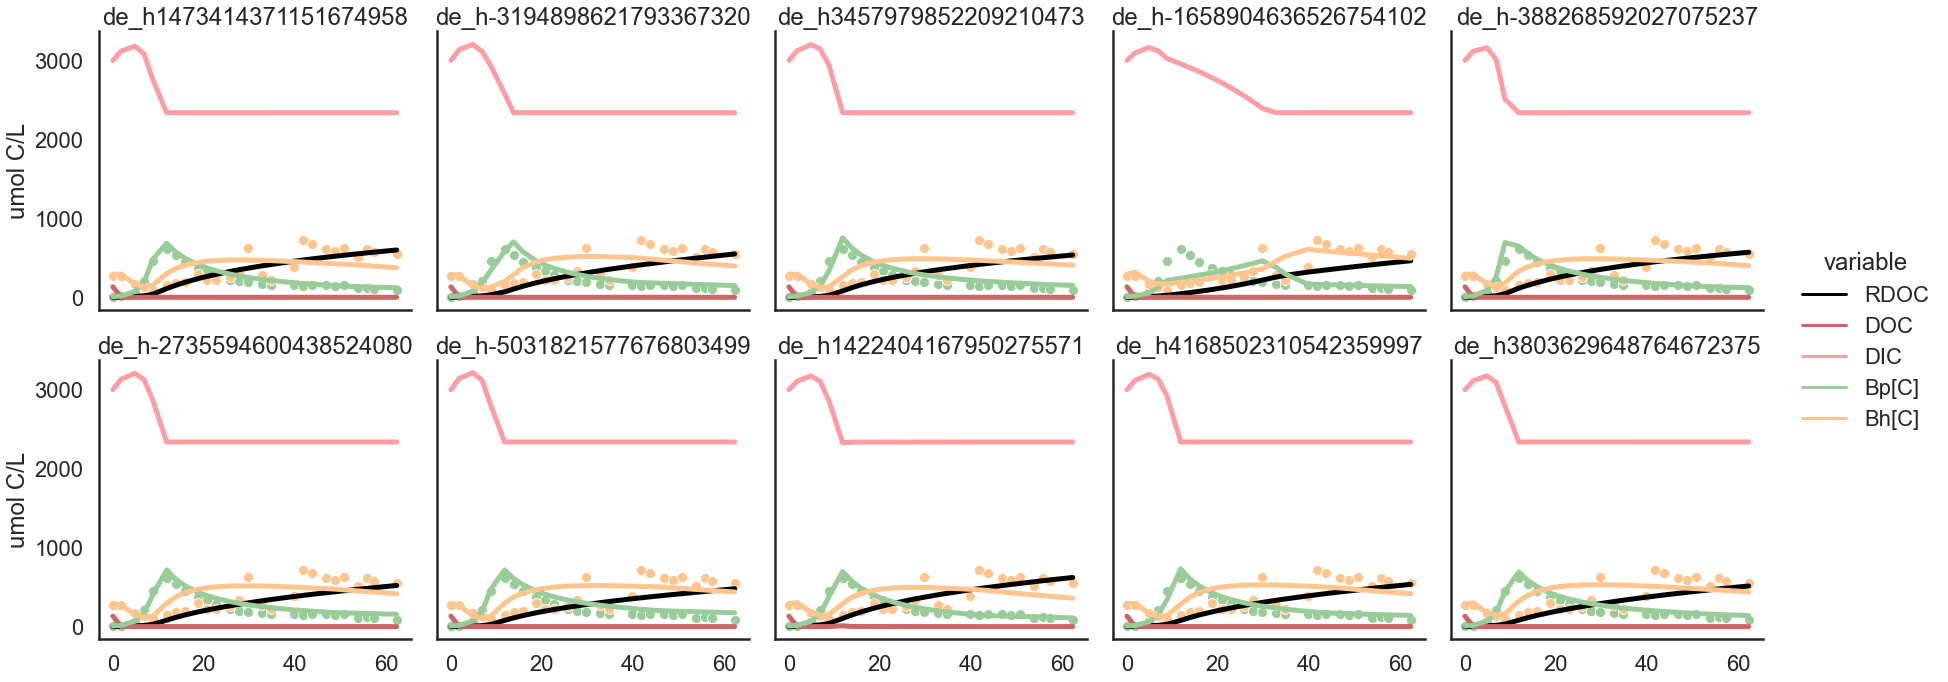

In [19]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(cccorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=cccorder, palette=cccpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol C/L')
g.set_titles(col_template='{col_name}',)



In [20]:
df.shape

In [21]:
import hdbscan


In [22]:
import umap

In [23]:
sample_cols = ['Bp', 'Bh', 'DON', 'DIN', 'RDON', 'DOC', 'DIC', 'RDOC']

sample_days = [ 5., 12., 16., 30., 44., 62.]

tdf = mdf.loc[mdf.day.round(0).isin(sample_days) & mdf.variable.isin(sample_cols)]

In [24]:
tdf['day0'] = tdf.day.round(0)
X = tdf.pivot(index='run_id', columns=['variable', 'day0'], values=['value'])

C:\Users\wosnat\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
X

value                          \
variable                              RDON                           
day0                                  5.0         12.0        16.0   
run_id                                                               
de2_h-1003520175011203320        44.437058   87.227756  103.405837   
de2_h-1019665815094019527        13.922627   32.640270   42.200416   
de2_h-1020786051406382456        80.705139   94.627381   95.218445   
de2_h-1022442923317150120       136.543528  156.761171  157.749900   
de2_h-105571108410293302         96.443735  132.652214  145.303737   
...                                    ...         ...         ...   
se2_9998_h-7848897770075249976   61.580765  109.813538  125.052364   
se2_9999_h-1953685857847270712   99.201472  142.345755  150.740180   
se2_999_h-1202036302319600203   105.869273  128.813925  130.355111   
se2_99_h-3684070667581532512    101.771707  145.570773  152.796237   
se2_9_h-6289657653515340097      38.682050   63.804658   75.200027   

                                                                               \
variable                                                                  DON   
day0                                  30.0        44.0        62.0       5.0    
run_id                                                                          
de2_h-1003520175011203320       134.343603  145.653478  150.475131   9.148836   
de2_h-1019665815094019527        70.327215   91.487233  111.799753   1.578869   
de2_h-1020786051406382456        95.305455   95.305512   95.305512  69.413842   
de2_h-1022442923317150120       157.974090  157.974446  157.974447   4.004893   
de2_h-105571108410293302        155.402923  156.273088  156.379132   4.615385   
...                                    ...         ...         ...        ...   
se2_9998_h-7848897770075249976  148.491957  154.226140  155.845118   5.388422   
se2_9999_h-1953685857847270712  157.741066  157.990717  157.999413   4.010118   
se2_999_h-1202036302319600203   130.836578  130.839716  130.839736  33.616159   
se2_99_h-3684070667581532512    157.884887  158.136649  158.149528   4.149116   
se2_9_h-6289657653515340097     105.535672  125.049739  140.714350   2.798150   

                                                                 ...  \
variable                                                         ...   
day0                                 12.0       16.0       30.0  ...   
run_id                                                           ...   
de2_h-1003520175011203320        8.965127   8.937360   8.915695  ...   
de2_h-1019665815094019527        1.541349   1.519856   1.520249  ...   
de2_h-1020786051406382456       69.000558  69.113473  69.133028  ...   
de2_h-1022442923317150120        3.841638   3.823546   3.827792  ...   
de2_h-105571108410293302         3.422105   3.700708   3.409299  ...   
...                                   ...        ...        ...  ...   
se2_9998_h-7848897770075249976   5.767294   6.774894   6.571463  ...   
se2_9999_h-1953685857847270712   5.494737   4.779149   4.964321  ...   
se2_999_h-1202036302319600203   33.594852  33.596329  33.596747  ...   
se2_99_h-3684070667581532512     4.132433   4.132374   4.132375  ...   
se2_9_h-6289657653515340097      2.594346   2.587233   2.585754  ...   

                                                                       \
variable                                DOC                             
day0                                   16.0         30.0         44.0   
run_id                                                                  
de2_h-1003520175011203320       2406.624688  2405.880830  2405.829211   
de2_h-1019665815094019527          7.434706     7.405599     7.404996   
de2_h-1020786051406382456          7.546368     7.507426     7.507391   
de2_h-1022442923317150120          1.342030     1.275775     1.276004   
de2_h-105571108410293302         114.651917    44.145886    39.913633   
...                             

In [26]:
reducer = umap.UMAP(random_state=42)
umap_embedding = reducer.fit_transform(X)

In [27]:
udf = pd.DataFrame(data=umap_embedding, columns=['UMAP1','UMAP2'])

In [28]:
udf['run_id'] = X.index

In [29]:
udf = pd.merge(udf, sum_df, on='run_id', how='left')

In [30]:
udf['logerror'] = np.log(udf['error'])

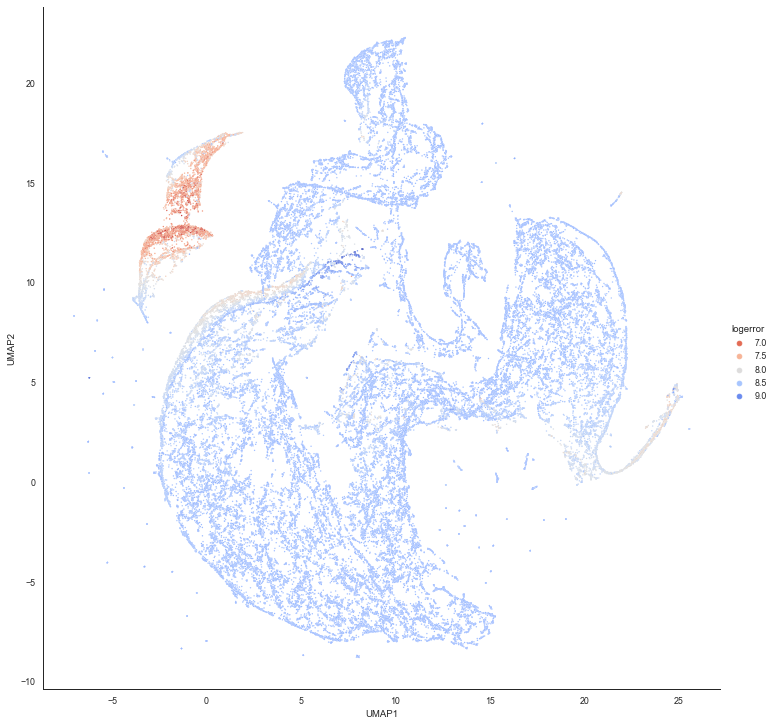

In [31]:
sns.set_context('paper')
sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='logerror', s=2, height=10, aspect=1, palette='coolwarm_r')

In [32]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=400, 
    min_samples=5, 
    core_dist_n_jobs=1, 
    #cluster_selection_epsilon = 20.0,
    #cluster_selection_method='leaf'
)
clusterer.fit(X)


HDBSCAN(core_dist_n_jobs=1, min_cluster_size=400, min_samples=5)

In [33]:
clusterer.labels_

array([ 3,  0,  0, ...,  3, -1,  0], dtype=int64)

In [34]:
clusterer.labels_.max()

3

In [35]:
(clusterer.labels_ < 0).sum()

11627

In [36]:
udf.shape

In [37]:
udf['cluster'] = clusterer.labels_

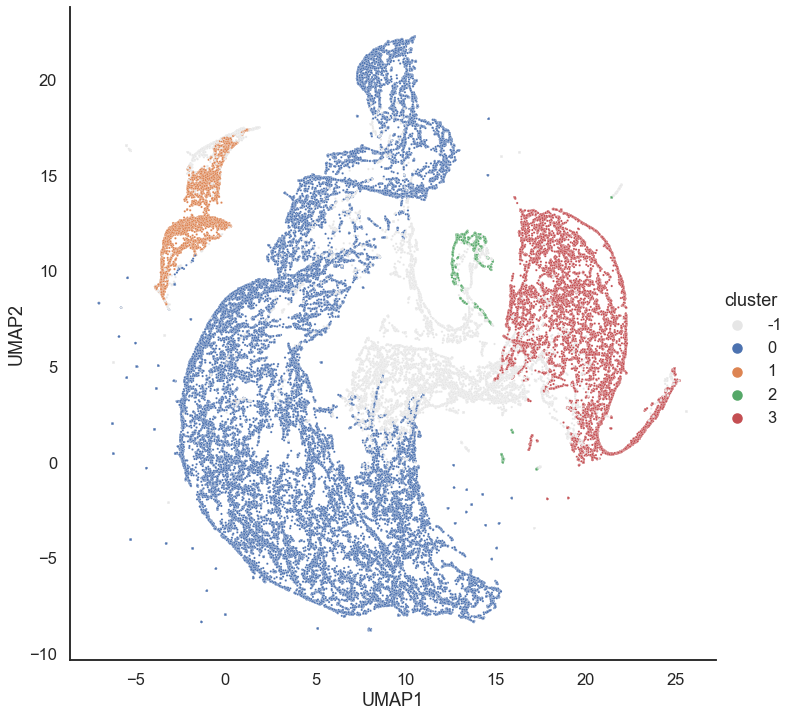

In [38]:
sns.set_context('talk')
cpalette=[(0.9,0.9,0.9),] +sns.color_palette('deep', clusterer.labels_.max()+1)

sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='cluster', s=5, 
            height=10, aspect=1, palette=cpalette, #size='error',
            legend='full')

<AxesSubplot:ylabel='$\\lambda$ value'>

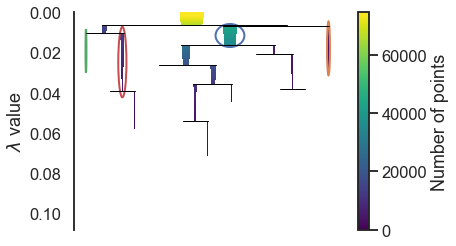

In [84]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=cpalette[1:])

In [40]:
udf.groupby('cluster')['error'].describe()

count         mean          std          min          25%  \
cluster                                                                
-1       11627.0  5057.473577  1028.477856   756.481471  4821.054006   
 0       44301.0  5400.141712   713.939987  2047.766559  5401.595175   
 1        4599.0  1940.840584   916.518400   721.638526  1325.975916   
 2        1426.0  5652.598571    48.775298  5415.415276  5637.940573   
 3       12577.0  5036.653246   825.564233  2224.912143  4828.693437   

                 50%          75%           max  
cluster                                          
-1       5519.874809  5611.170908  11273.180187  
 0       5586.738858  5632.047230  12403.149251  
 1       1652.211102  2239.456827   6974.971461  
 2       5662.746213  5680.932521   5938.292227  
 3       5455.286326  5570.985187   6338.693191

In [41]:
udf.head()

UMAP1      UMAP2                     run_id  Unnamed: 0           M_h  \
0  20.221712   3.009346  de2_h-1003520175011203320           0  5.873991e-06   
1   4.738433   7.897155  de2_h-1019665815094019527           0  2.912892e-06   
2   3.267959  11.598664  de2_h-1020786051406382456           0  7.231211e-06   
3  10.783566  -7.260574  de2_h-1022442923317150120           0  7.860829e-06   
4   7.794780  -2.272591   de2_h-105571108410293302           0  9.847795e-07   

        M_p  gamma^D_p  gamma^D_h    R_p    R_h  ...         VTmax       KT_h  \
0  0.000002   0.435821   0.866970  6.625  6.625  ...  8.835720e-05   5.722236   
1  0.000002   0.861985   0.919232  6.625  6.625  ...  8.613593e-05   9.106378   
2  0.000007   0.736024   0.376154  6.625  6.625  ...  2.015296e-04  12.728721   
3  0.000009   0.261886   0.431050  6.625  6.625  ...  1.899946e-04  19.619042   
4  0.000009   0.216266   0.024306  6.625  6.625  ...  3.349666e-07   3.467098   

      omega  status        h_err        p_err        error  logerror  message  \
0  1.655559       0  3889.949813  1382.060093  5272.009906  8.570167      NaN   
1  0.421618       0  4064.284582  1458.908619  5523.193201  8.616711      NaN   
2  0.776036       0  3971.384341  1604.596846  5575.981186  8.626224      NaN   
3  0.953672       0  3974.468058  1610.118819  5584.586877  8.627766      NaN   
4  0.482748       0  3924.817950  1530.779472  5455.597422  8.604397      NaN   

   cluster  
0        3  
1        0  
2        0  
3        0  
4       -1  

[5 rows x 43 columns]

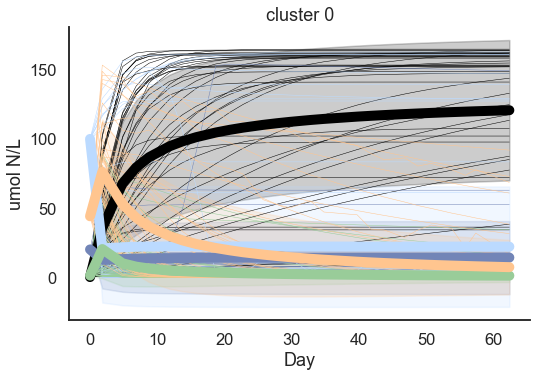

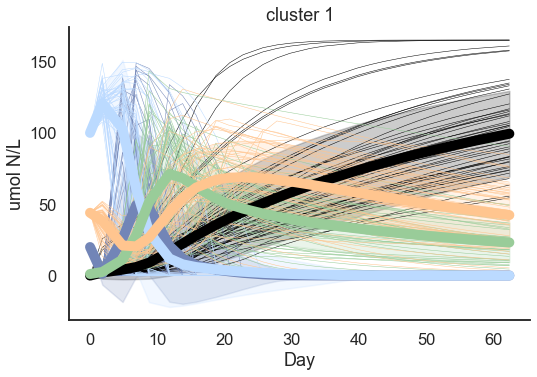

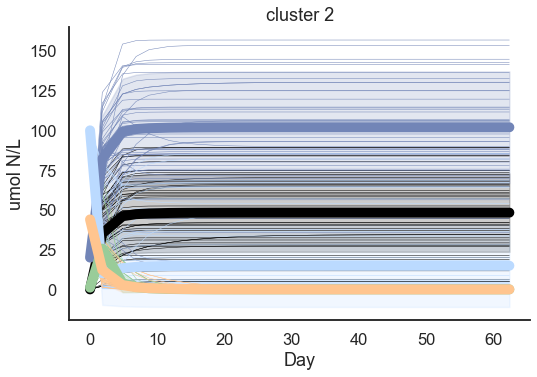

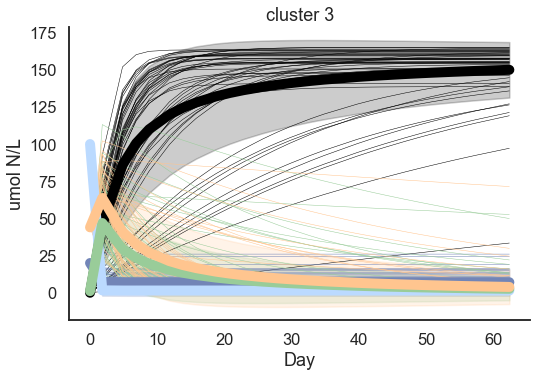

In [83]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in range(0,clusterer.labels_.max()+1):
    ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, legend=False, lw=10,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


<AxesSubplot:xlabel='Day', ylabel='value'>

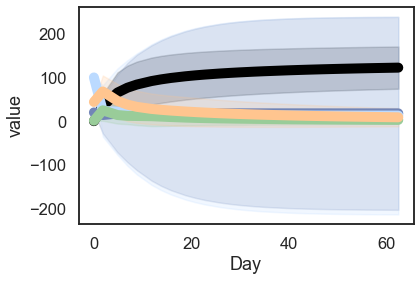

In [82]:
    sns.lineplot(data=mdf2,
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, legend=False, lw=10,ci='sd',
                 #ls='--',
    )


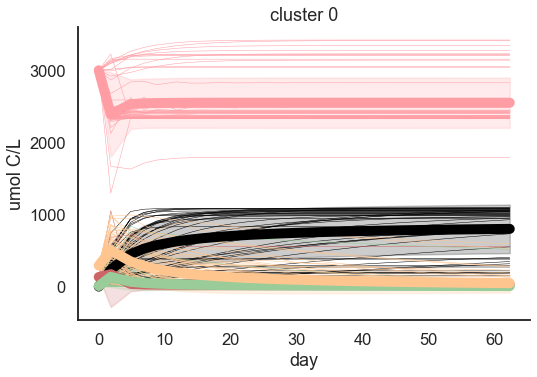

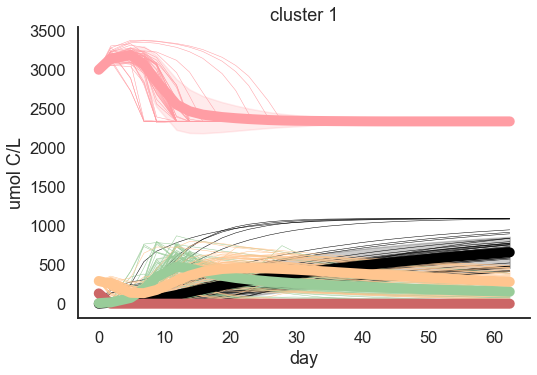

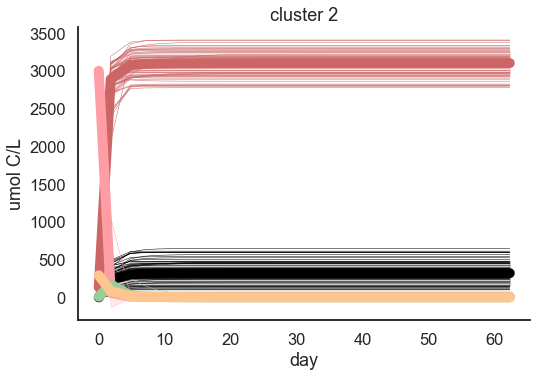

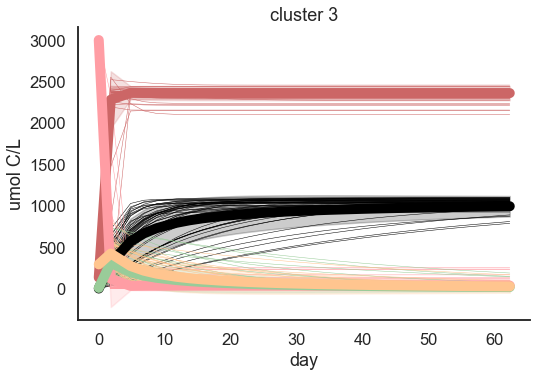

In [85]:
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)




for i in range(0,clusterer.labels_.max()+1):
    ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette, legend=False, lw=10, ci='sd'
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol C/L', xlabel='day', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


In [44]:
udf.head()

UMAP1      UMAP2                     run_id  Unnamed: 0           M_h  \
0  20.221712   3.009346  de2_h-1003520175011203320           0  5.873991e-06   
1   4.738433   7.897155  de2_h-1019665815094019527           0  2.912892e-06   
2   3.267959  11.598664  de2_h-1020786051406382456           0  7.231211e-06   
3  10.783566  -7.260574  de2_h-1022442923317150120           0  7.860829e-06   
4   7.794780  -2.272591   de2_h-105571108410293302           0  9.847795e-07   

        M_p  gamma^D_p  gamma^D_h    R_p    R_h  ...         VTmax       KT_h  \
0  0.000002   0.435821   0.866970  6.625  6.625  ...  8.835720e-05   5.722236   
1  0.000002   0.861985   0.919232  6.625  6.625  ...  8.613593e-05   9.106378   
2  0.000007   0.736024   0.376154  6.625  6.625  ...  2.015296e-04  12.728721   
3  0.000009   0.261886   0.431050  6.625  6.625  ...  1.899946e-04  19.619042   
4  0.000009   0.216266   0.024306  6.625  6.625  ...  3.349666e-07   3.467098   

      omega  status        h_err        p_err        error  logerror  message  \
0  1.655559       0  3889.949813  1382.060093  5272.009906  8.570167      NaN   
1  0.421618       0  4064.284582  1458.908619  5523.193201  8.616711      NaN   
2  0.776036       0  3971.384341  1604.596846  5575.981186  8.626224      NaN   
3  0.953672       0  3974.468058  1610.118819  5584.586877  8.627766      NaN   
4  0.482748       0  3924.817950  1530.779472  5455.597422  8.604397      NaN   

   cluster  
0        3  
1        0  
2        0  
3        0  
4       -1  

[5 rows x 43 columns]

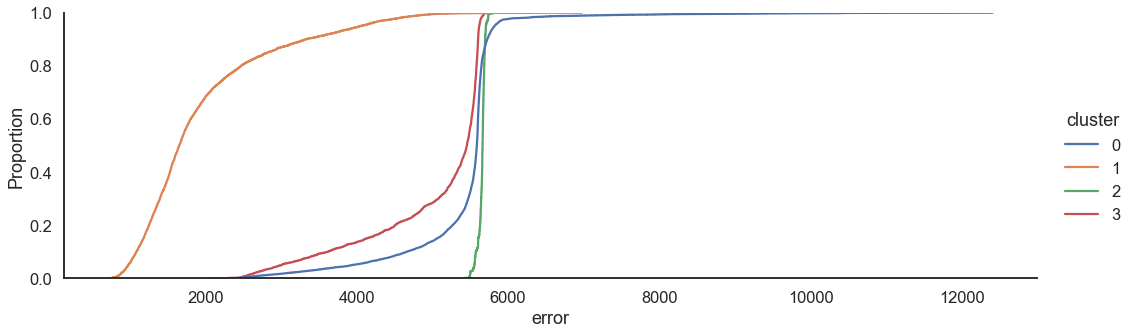

In [79]:
sns.displot(data=udf.loc[udf.cluster>=0], 
            x='error', hue='cluster', palette=cpalette[1:], aspect=3, kind='ecdf')

In [46]:
cols_to_lookat = ['M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 
       'E^O_p', 'E^I_h', 
       'Vmax^IN_p',  'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h',  'epsilon', 'VTmax', 'omega']

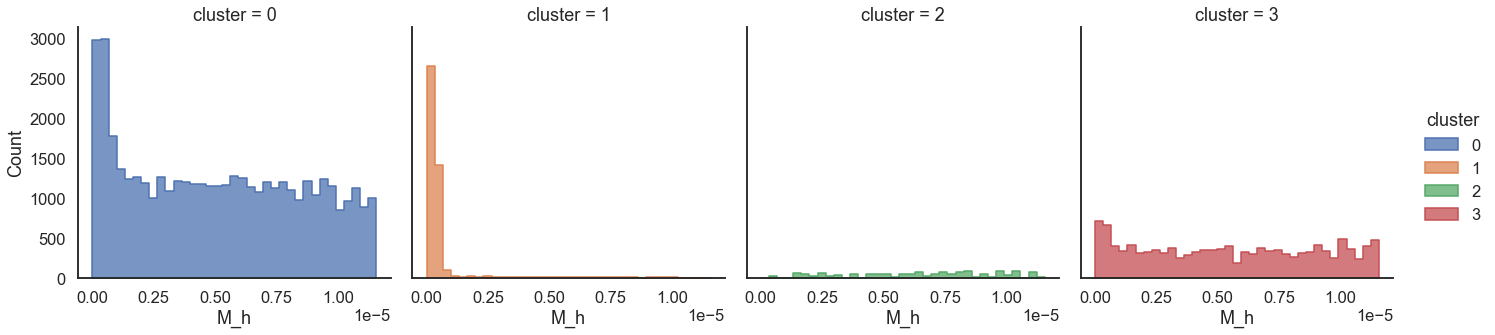

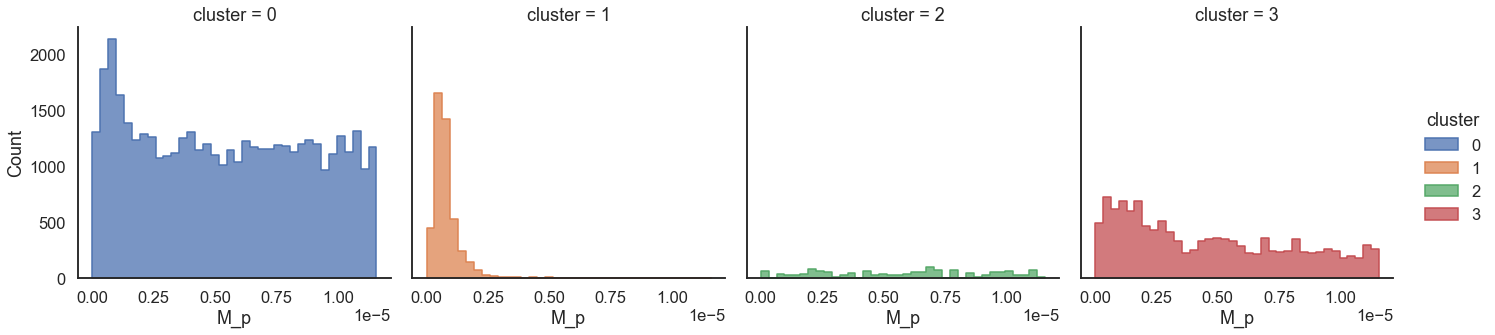

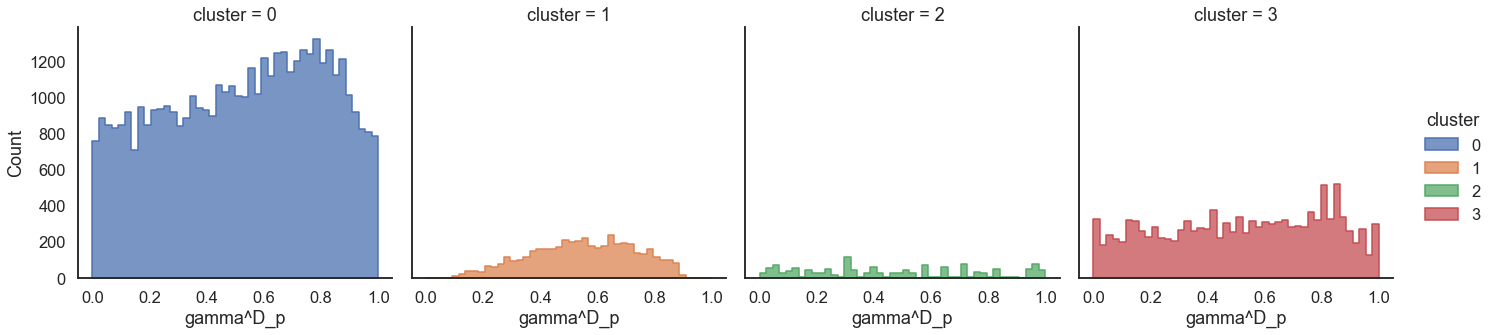

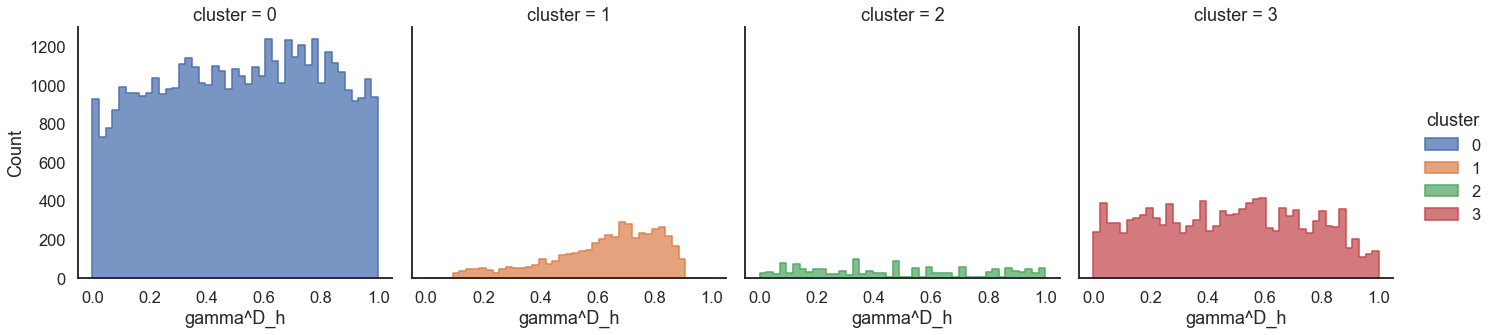

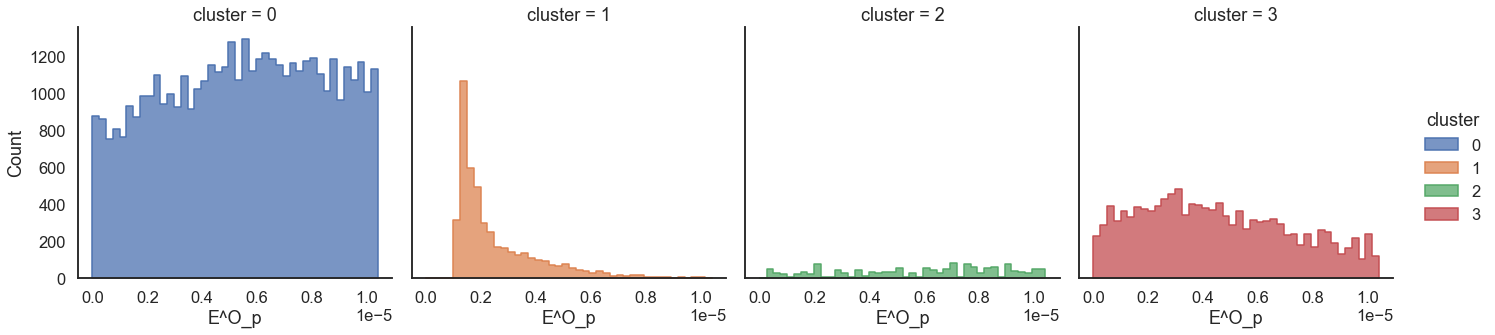

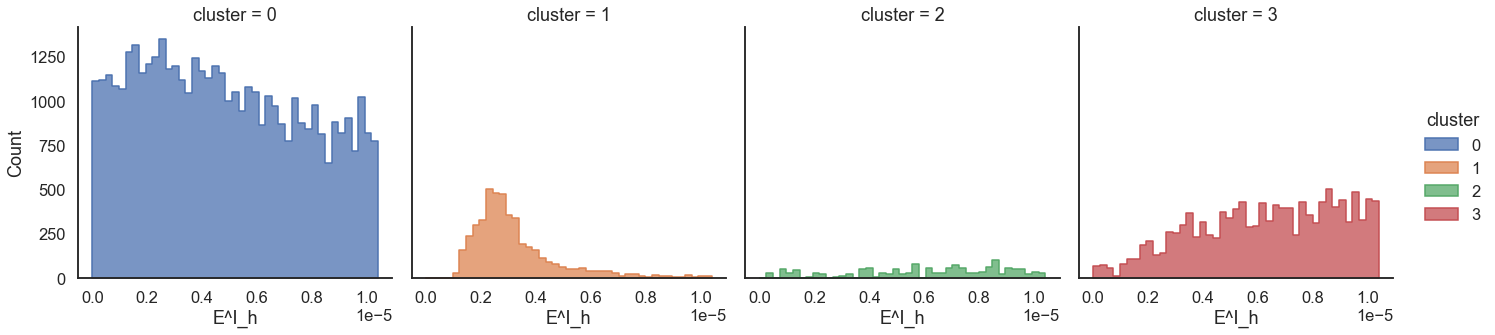

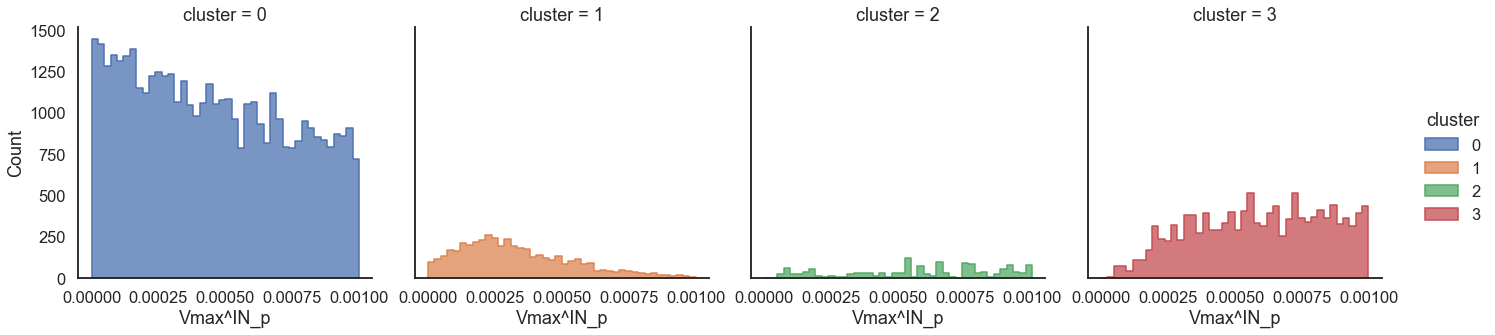

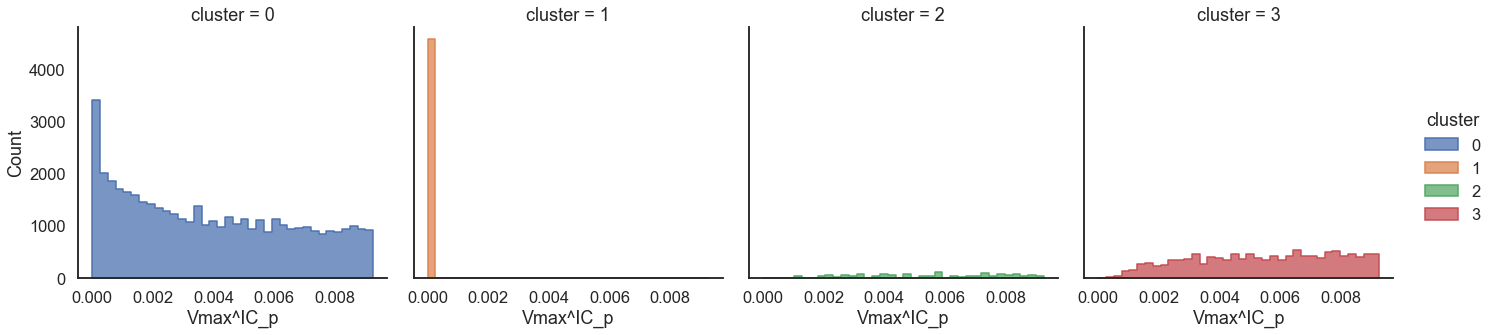

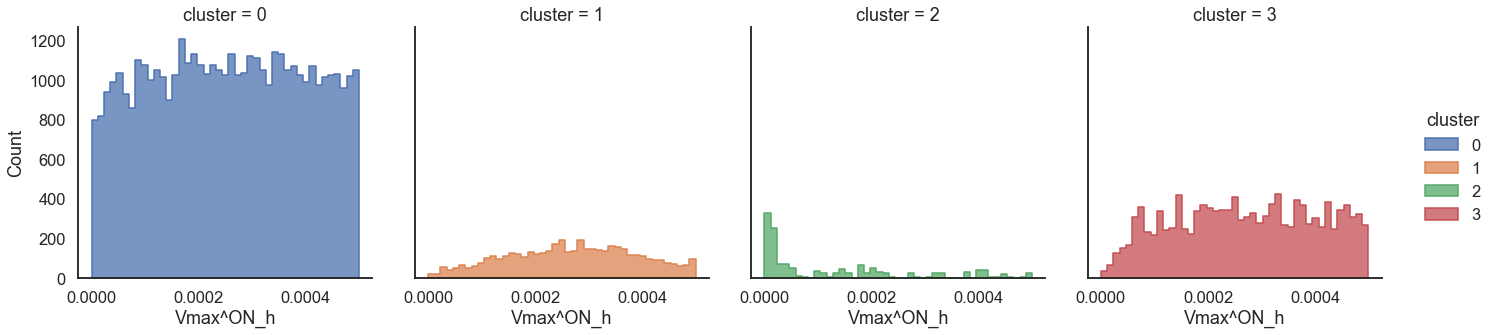

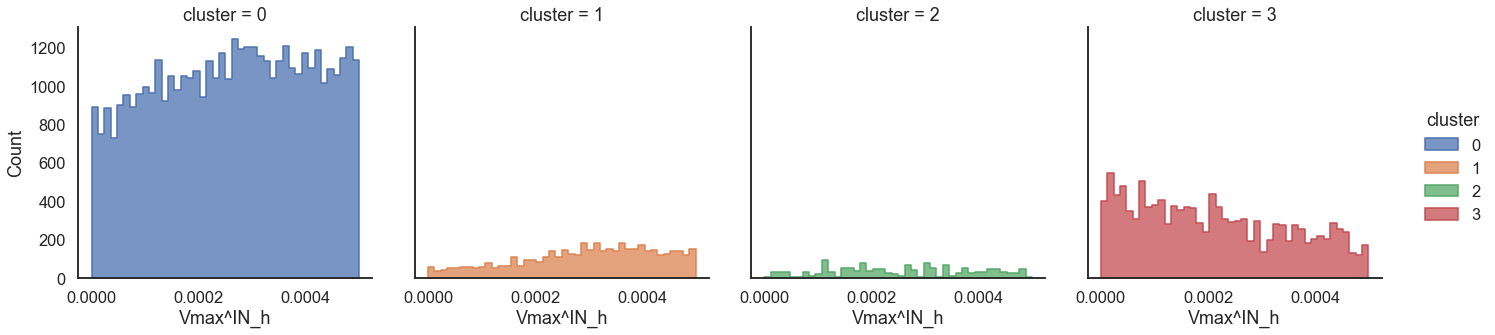

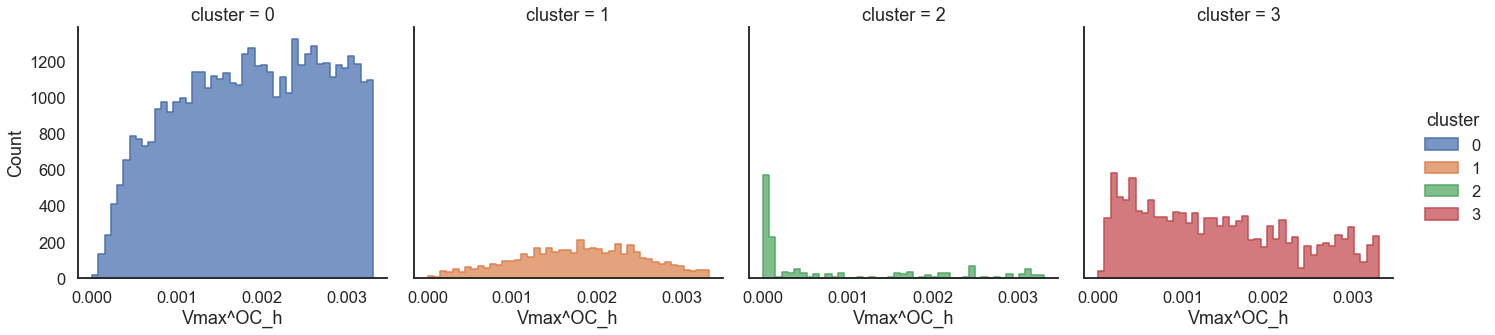

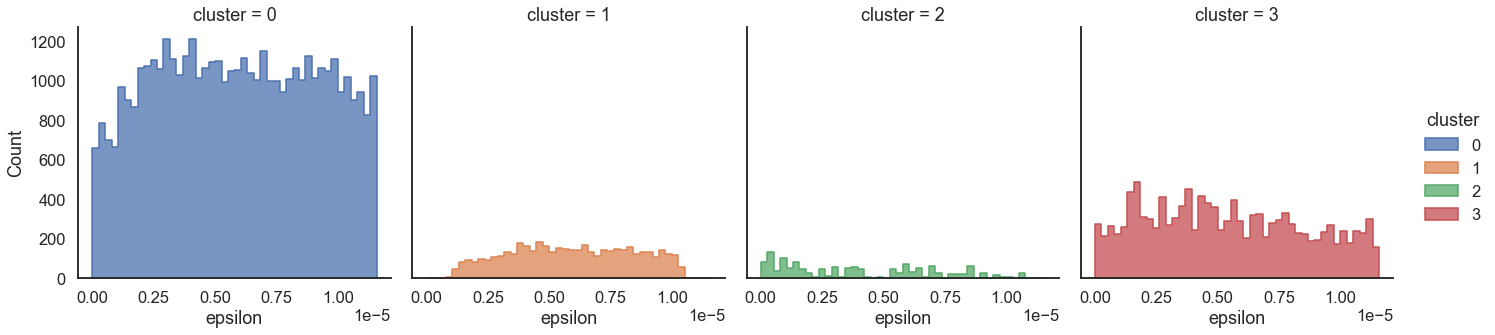

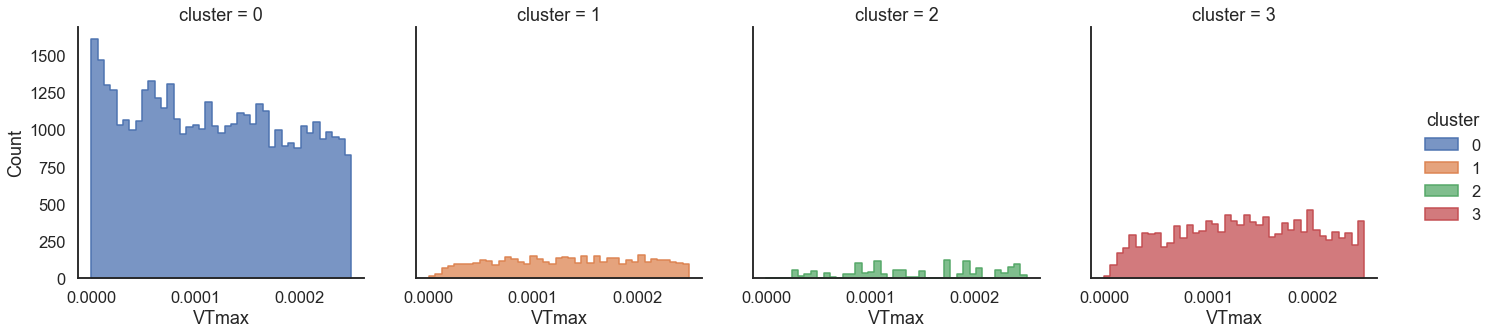

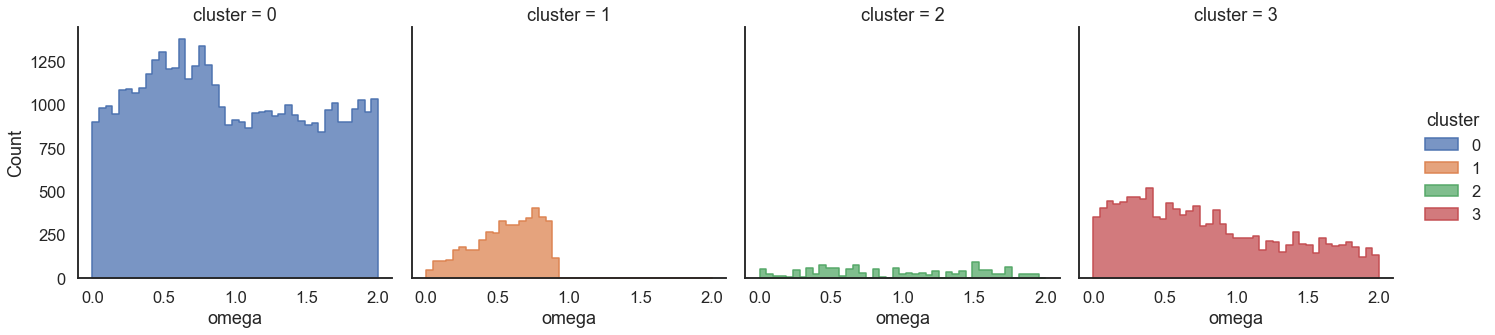

In [47]:
for c in cols_to_lookat:
    sns.displot(data=udf.loc[udf.cluster>=0], 
                x=c, hue='cluster', palette=cpalette[1:], kind='hist', element='step', multiple='stack', col='cluster' )

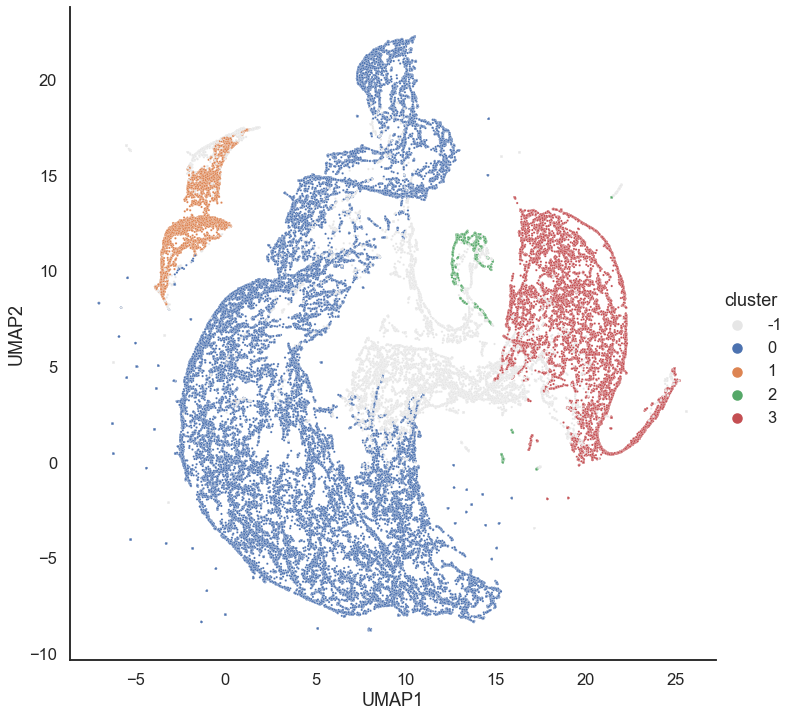

In [48]:
sns.set_context('talk')
cpalette=[(0.9,0.9,0.9),] +sns.color_palette('deep', clusterer.labels_.max()+1)

sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='cluster', s=5, 
            height=10, aspect=1, palette=cpalette, #size='error',
            legend='full')